# Investigating a Data Set - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> This analysis covers a data set containing information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. The original data set was collected by Kaggle and can be viewed in CSV format [Here](https://www.kaggle.com/tmdb/tmdb-movie-metadata). This full report including all the files used and the final dataset can be viewed in [This GitHub Repository](https://github.com/TrikerDev/Investigating-a-Data-Set---TMDB-Movies). This analysis is not to prove anything. It is to find possible correlations between certain points of data. This information is all tentative and **correlation does not equal causation**.

## Questions to answer

> * How has the number of movies produced changed over time?
> * How has the average runtime of movies changed over the years?
> * What genres are associated with the most amount of movies?
> * How has the average rating of films changed over time?
> * How do popularity and profit correlate?

In [67]:
# Importing the packages that will be used for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

## General Properties

In [68]:
# Loading in our dataset in the form of a Pandas DataFrame. We name the variable 'df' for DataFrame as its short and sweet
df = pd.read_csv('tmdb-movies.csv')

# Displaying the first few rows of df to make sure it imported correctly
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


> Now, some of these numbers are pretty strange. Specifically the **budget_adj** and **revenue_adj** columns. These are displaying in scientific notation. We dont want that.

In [69]:
# Changing the scientific notation values to display as floats. Changing very long numbers to be rounded up to have only
# two numbers after the decimal
pd.options.display.float_format = '{:.2f}'.format

#Displaying the first few rows again to see if the numbers have changed
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


> Displaying our table in a few different views to get some more information

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [71]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [72]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data Cleaning

> First, we are going to delete the columns that we dont need for this analysis. This will make the table overall more manageable and less cluttered.

> The columns that are not needed are:
> * imdb_id
> * homepage
> * tagline
> * overview
> * release_date (we dont need the specific date, only the release year, which is in a sepereate column)

In [73]:
# Getting rid of columns that we dont want
new_df = df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'release_date'], axis = 1)
new_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939.28,348161292.49
2,262500,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955.47,271619025.41
3,140607,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919.04,1902723129.80
4,168259,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923.09,1385748801.47


> Another issue is how some data is presented in this table. Certain columns such as 'cast' have many values seperated by a '|' sign. We will seperate each of these values into their own unique value. The columns containing these values are:
> * cast
> * director
> * genre
> * keywords
> * production_companies

In [74]:
# Sepereate the values by the '|' symbol, and joining them into new dataframes
cast_df = (new_df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
director_df = (new_df['director'].str.split('|', expand = True).rename(columns=lambda x: f"director_{x+1}"))
genre_df = (new_df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
keywords_df = (new_df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
production_df = (new_df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

> Displaying these new dataframes to make sure the splitting worked

In [75]:
# Cast df
cast_df.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [76]:
# Director df
director_df.head()

,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,...,director_27,director_28,director_29,director_30,director_31,director_32,director_33,director_34,director_35,director_36
0,Colin Trevorrow,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,George Miller,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Robert Schwentke,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,J.J. Abrams,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,James Wan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


> The reason there are so many 'None' values here is because the columns have to expand to take into account every movie, so every row has the same amount of values. This means that one movie had as many as 36 directors!

> Found it:

In [77]:
director_df[director_df.director_36.notnull()]

##(wow. truly incredible)##

,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,...,director_27,director_28,director_29,director_30,director_31,director_32,director_33,director_34,director_35,director_36
7751,Theo Angelopoulos,Olivier Assayas,Bille August,Jane Campion,Youssef Chahine,Chen Kaige,Michael Cimino,Ethan Coen,Joel Coen,David Cronenberg,...,Roman Polanski,RaÃºl Ruiz,Walter Salles,Elia Suleiman,Tsai Ming-Liang,Gus Van Sant,Lars von Trier,Wim Wenders,Wong Kar-wai,Zhang Yimou


In [78]:
# Genres df
genre_df.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [79]:
# Production Companies df
production_df.head()

,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [80]:
# Keywords df
keywords_df.head()

,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5
0,monster,dna,tyrannosaurus rex,velociraptor,island
1,future,chase,post-apocalyptic,dystopia,australia
2,based on novel,revolution,dystopia,sequel,dystopic future
3,android,spaceship,jedi,space opera,3d
4,car race,speed,revenge,suspense,car


> Now the next thing we need to do is join these seperate tables back into our main table.

In [81]:
# Start by dropping the columns we split
dropped_df = new_df.drop(['cast', 'director', 'genres', 'keywords', 'production_companies'], axis = 1)
dropped_df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,124,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,120,6185,7.10,2015,137999939.28,348161292.49
2,262500,13.11,110000000,295238201,Insurgent,119,2480,6.30,2015,101199955.47,271619025.41
3,140607,11.17,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.50,2015,183999919.04,1902723129.80
4,168259,9.34,190000000,1506249360,Furious 7,137,2947,7.30,2015,174799923.09,1385748801.47


In [82]:
# Now, adding back in our newly created tables in place of the ones we dropped
final_df = dropped_df.join([cast_df, genre_df, keywords_df, production_df, director_df])

In [83]:
# Checking for duplicate rows
final_df.duplicated().sum()
# Found 1 duplicate row

1

In [84]:
# Removing duplicate row
final_df.drop_duplicates(keep ='first', inplace=True)

In [85]:
# Checking again for duplicate rows
final_df.duplicated().sum()

0

In [86]:
# Checking the types of the columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10865 non-null  int64  
 1   popularity              10865 non-null  float64
 2   budget                  10865 non-null  int64  
 3   revenue                 10865 non-null  int64  
 4   original_title          10865 non-null  object 
 5   runtime                 10865 non-null  int64  
 6   vote_count              10865 non-null  int64  
 7   vote_average            10865 non-null  float64
 8   release_year            10865 non-null  int64  
 9   budget_adj              10865 non-null  float64
 10  revenue_adj             10865 non-null  float64
 11  cast_1                  10789 non-null  object 
 12  cast_2                  10645 non-null  object 
 13  cast_3                  10555 non-null  object 
 14  cast_4                  10446 non-null

> Now, the data is all cleaned and presented nicely, the duplicate rows are gone. We are ready to begin our analysis.

<a id='eda'></a>
# Exploratory Data Analysis

## How has the number of movies produced changed over time?

In [87]:
# Counting the number of movies in each release year
year_movies = final_df["release_year"].value_counts().sort_index()

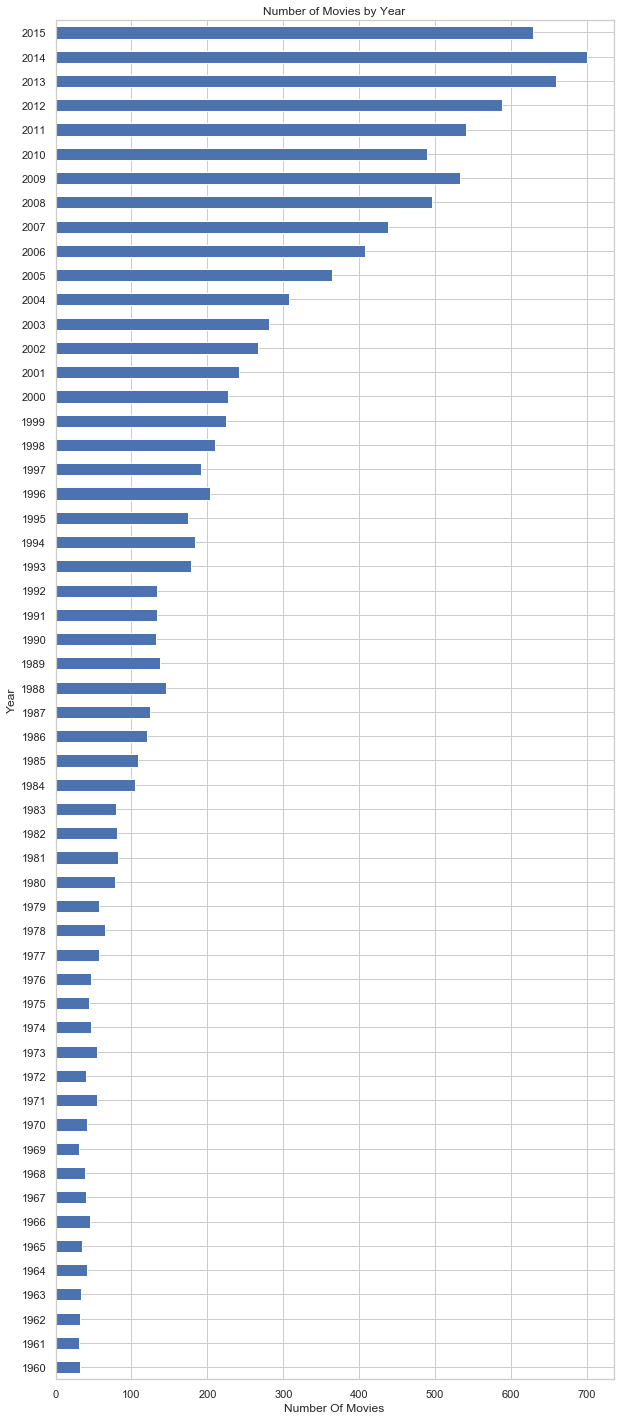

In [88]:
# Plotting the movies per year in a horiontal bar graph
year_movies.plot(kind='barh', figsize=(10,25))
plt.title('Number of Movies by Year')
plt.xlabel('Number Of Movies')
plt.ylabel('Year')
plt.show()

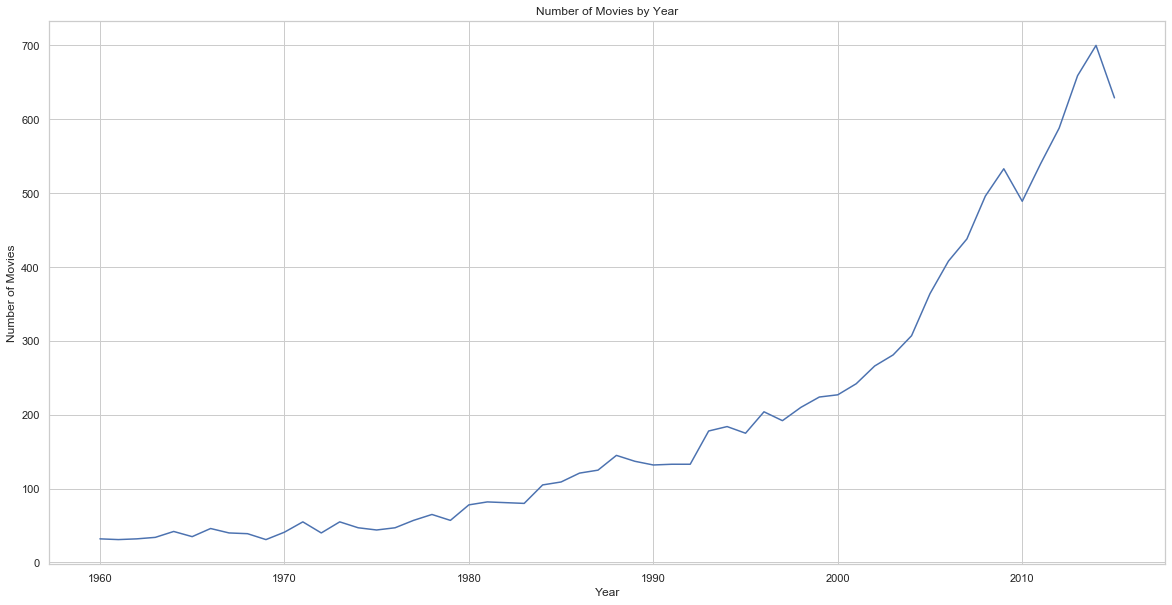

In [89]:
# Plotting the movies per year in a line graph
year_movies.plot(figsize = (20,10))
plt.title('Number of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

> These charts show that the amount of movies produced per year has greatly increased overtime. There was potentially a peak in 2014, and it is now backing off a bit, but the data only goes to 2015, so that is inconclusive.

## How has the average runtime of movies changed over the years?

In [90]:
# Getting the info we are going to chart
final_df['runtime'].describe()

count   10865.00
mean      102.07
std        31.38
min         0.00
25%        90.00
50%        99.00
75%       111.00
max       900.00
Name: runtime, dtype: float64

> This shows that the average runtime of all movies is about 102 minutes

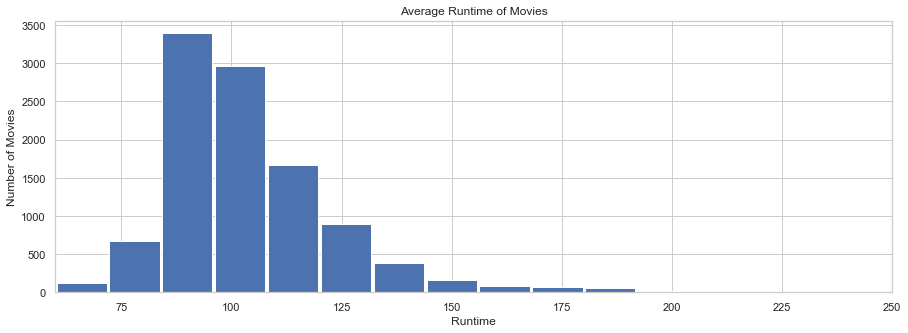

In [91]:
# Plotting a histogram of runtime of movies
plt.figure(figsize=(15,5))
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Average Runtime of Movies')
plt.xlim(60, 250)
plt.hist(final_df['runtime'], rwidth = 0.95, bins = 75)
plt.show()

> Bar chart visualization of our previous data

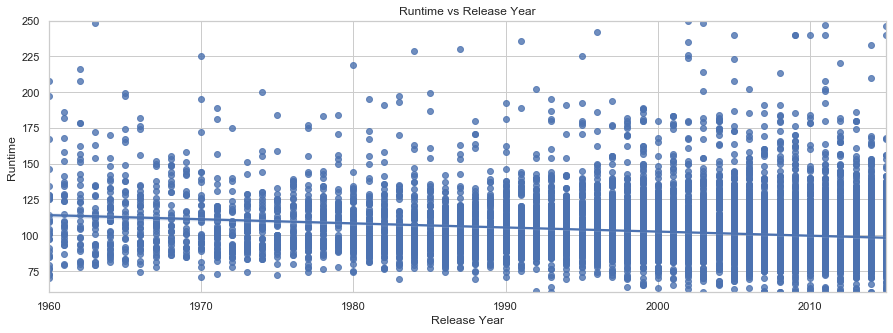

In [92]:
plt.figure(figsize=(15,5))
plt.ylim(60, 250)
sns.regplot(x=final_df["release_year"],y=final_df["runtime"]).set_title("Runtime vs Release Year")
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.show()

> This scatter plot is grouped by Runtime vs Release Year. This shows us that the runtime of movies on average really isnt changing over the years. Most movies tend to stay around 100 - 125 minutes, no matter if they were released in 1970 or 2010. They all stay around the same length. This could potentially show us that people prefer watching a movie around 2 hours in length, rather than shorter or longer.

##  What genres are associated with the most amount of movies?

In [93]:
# Splitting the orignal DataFrame genres to be counted individually
def count(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

# Calling genres to be split and counted
genre_count = count('genres')

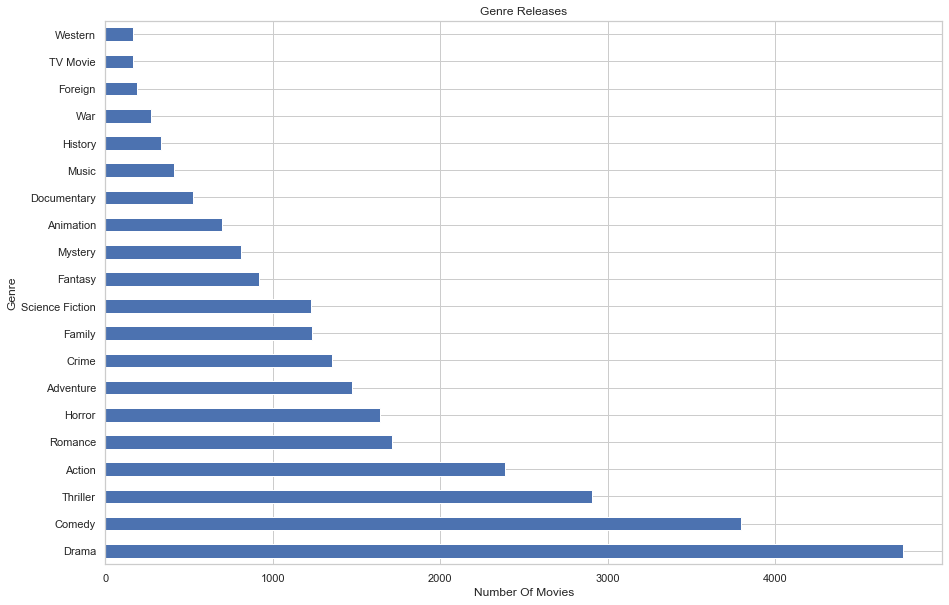

In [94]:
# Plotting a horizontal bar chart
genre_count.plot(kind= 'barh',figsize = (15,10))
plt.title("Genre Releases")
plt.xlabel('Number Of Movies')
plt.ylabel("Genre")
plt.show()

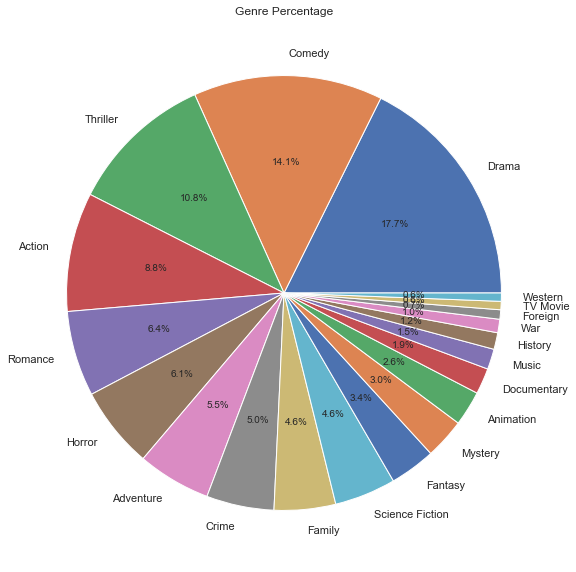

In [95]:
genre_count.plot(kind = 'pie', figsize = (10,10), autopct='%1.1f%%')
plt.title("Genre Percentage")
plt.ylabel('')
plt.show()

> These charts show us that Drama is the most popular genre. However, many movies are categorized by many different genres. So this could mean that Drama is a very popular 'sub-genre' to put a movie under. For example, a movies genres could be 'Action,Horror,Drama', and it will count towards all three categories. Perhaps drama is just a very easy category to stick a movie under and this is why it has such a large amount of movies under that category.

## How has the average rating of films changed over time?

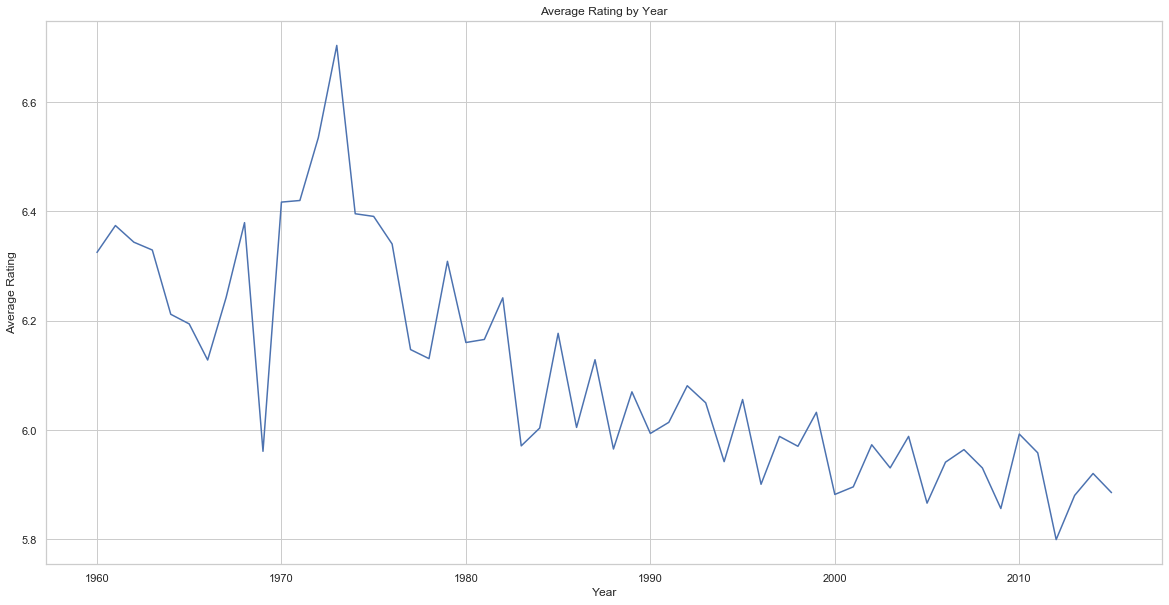

In [96]:
# Grouping by release year and the mean of the average vote
year_vote_avg = final_df.groupby('release_year')['vote_average'].mean()
# Plotting line chart
year_vote_avg.plot(figsize = (20,10))
plt.title('Average Rating by Year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

> This shows us that the average rating of movies has been steadily dropping throughout the years, however there are many variables behind this that are not being taken into account. For example, the viewership of movies has been significantly increasing throughout the years. So with significantly more people watching movies, and significantly more positive and negative votes, the average may have been decreasing to meet up with so many more viewers. In the past, perhaps only movie enthusiasts viewed so many movies, and their average rating is higher than a 'normal' person who may on average score movies lower. Now with so many more 'normal' people viewing movies, rather than just enthusiasts, the average score has decreased for that reason.

> Another reason is that so many more movies are being released year by year. This means that highly scored movies are being released, but it also means significantly more lower scored movies are also being released. Perhaps the lower score movies outnumber the releases of higher score movies, on account of they may be faster and easier to produce than big budget movies, therefore bringing the average score of all movies lower.

## How do popularity and profit correlate?

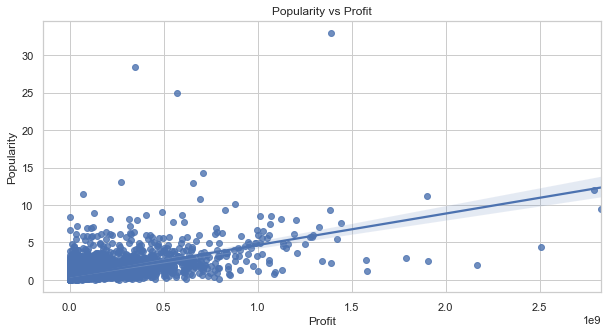

In [97]:
# Setting up scatterplot to compare profit and popularity
plt.figure(figsize=(10,5))
sns.regplot(x=final_df['revenue_adj'],y=final_df['popularity'])
plt.title('Popularity vs Profit')
plt.xlabel('Profit')
plt.ylabel('Popularity')
plt.show()

> This plot shows that there is a positive correlation between popularity and profit, however most are grouped very closely.

<a id='conclusions'></a>
# Conclusions

>* The number of movies produced is increasing over time
>* The average runtime is staying relatively the same over time
>* Drama genre is affiliated with the most amount of movies
>* The average rating of films has been decreasing over time
>* There is a positive correlation between popularity and profitability


# Limitations

>* There could be any amount of hidden variables that are not taken into account for this analysis
>* This is a very basic analysis and is not meant to predict anything for the future. Its an analysis of past data
>* There are many outliers in the data, specifically runtime, that had to be disregarded
>* __Correlation does not equal causation!__
